In [2]:
# Import libraries
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data_audio_f_mean.csv')

In [7]:
df_test = df.iloc[:, 5:19]

In [8]:
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)

In [9]:
df_test = df_test.astype({"target": int})

In [10]:
y = df_test['target']

In [11]:
df_test = df_test.drop('target', 1)

In [21]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.3,
    random_state=200
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(37839, 13) (37839,)
(16218, 13) (16218,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Import metrics model to check the accuracy
from sklearn import metrics

# Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)

scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(Y_test, y_pred)
    scores_list.append(metrics.accuracy_score(Y_test, y_pred))

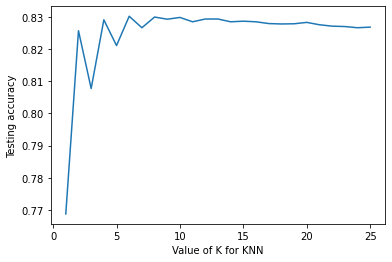

In [23]:
# Evaluate your model

%matplotlib inline
import matplotlib.pyplot as plt

# Plot the relationship between K and the testing accuracy
plt.plot(k_range, scores_list);
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing accuracy');

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     13218
           1       0.65      0.14      0.23      3000

    accuracy                           0.83     16218
   macro avg       0.74      0.56      0.56     16218
weighted avg       0.80      0.83      0.78     16218

